<a href="https://colab.research.google.com/github/razzlestorm/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/Jerimiah_Willhite2_of_LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
#Load Data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.names

In [9]:
#Read/View Data
col_names = [
    'Party', 
    'handicapped-infants',
 'water-project-cost-sharing',
 'budget-resolution',
'physician-fee-freeze',
 'el-salvador-aid',
 'religious-groups-in-schools',
 'anti-satellite-test-ban',
 'aid-to-contras',
 'mx-missile',
 'immigration',
 'synfuels-corporation',
 'education-spending',
 'right-to-sue',
 'crime',
 'duty-free-exports',
 'export-admin-S-Africa',
]

data = pd.read_csv("house-votes-84.data", header=None, names=col_names)
pd.options.display.max_columns = None


print(data.shape)
print(data.head())

(435, 17)
        Party handicapped-infants water-project-cost-sharing  \
0  republican                   n                          y   
1  republican                   n                          y   
2    democrat                   ?                          y   
3    democrat                   n                          y   
4    democrat                   y                          y   

  budget-resolution physician-fee-freeze el-salvador-aid  \
0                 n                    y               y   
1                 n                    y               y   
2                 y                    ?               y   
3                 y                    n               ?   
4                 y                    n               y   

  religious-groups-in-schools anti-satellite-test-ban aid-to-contras  \
0                           y                       n              n   
1                           y                       n              n   
2                           

In [10]:
data.isna().sum()

Party                          0
handicapped-infants            0
water-project-cost-sharing     0
budget-resolution              0
physician-fee-freeze           0
el-salvador-aid                0
religious-groups-in-schools    0
anti-satellite-test-ban        0
aid-to-contras                 0
mx-missile                     0
immigration                    0
synfuels-corporation           0
education-spending             0
right-to-sue                   0
crime                          0
duty-free-exports              0
export-admin-S-Africa          0
dtype: int64

In [0]:
dems = data[data['Party'] == 'democrat']
reps = data[data['Party'] == 'republican']
bills = data.columns[1:]

In [20]:
yeas = 0
nays = 0
for i in dems['religious-groups-in-schools']:

    if i == 'y':
        yeas += 1
    elif i == 'n':
        nays += 1
print(f'Yeas: {yeas}, Nays: {nays}')

ryeas = 0
rnays = 0
for i in reps['religious-groups-in-schools']:

    if i == 'y':
        ryeas += 1
    elif i == 'n':
        rnays += 1
print(f'Yeas: {ryeas}, Nays: {rnays}')

Yeas: 123, Nays: 135
Yeas: 149, Nays: 17


In [17]:
religious_dems = dems[dems['religious-groups-in-schools'] == 'y']
religious_dems.shape

(123, 17)

In [19]:
religious_reps = reps[reps['religious-groups-in-schools'] == 'y']
religious_reps.shape

(149, 17)

In [29]:
vote_map = {'y': 1, 'n': 0, '?': 0}

sample_data_dems = dems['religious-groups-in-schools'].sample(50)
sample_data_dems = sample_data_dems.map(vote_map)
sample_data_dems.head()

181    0
397    0
76     1
143    0
24     0
Name: religious-groups-in-schools, dtype: int64

In [30]:
sample_data_reps = reps['religious-groups-in-schools'].sample(50)
sample_data_reps = sample_data_reps.map(vote_map)
sample_data_reps.head()

363    1
235    1
120    1
379    1
355    0
Name: religious-groups-in-schools, dtype: int64

In [31]:
tstat, pvalue = ttest_ind(sample_data_dems, sample_data_reps)
print(tstat)
print(pvalue)

-5.363687667454794
5.44439214673133e-07


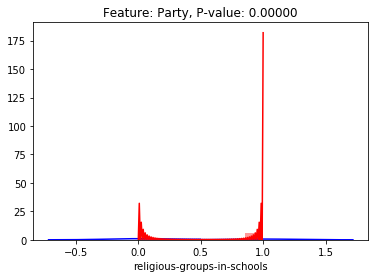

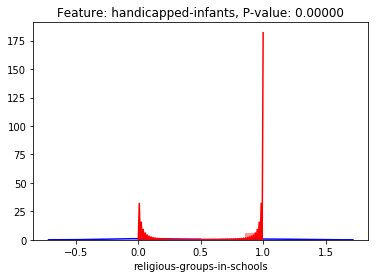

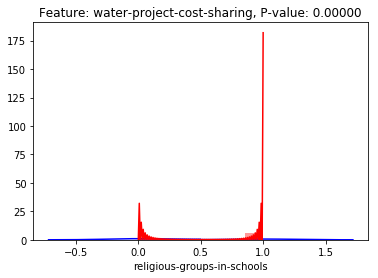

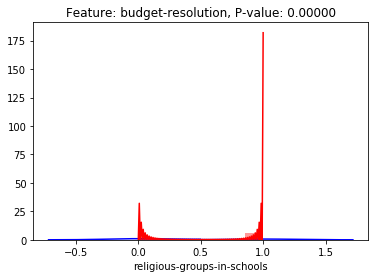

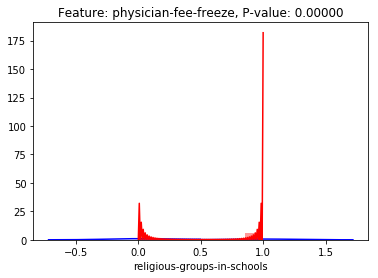

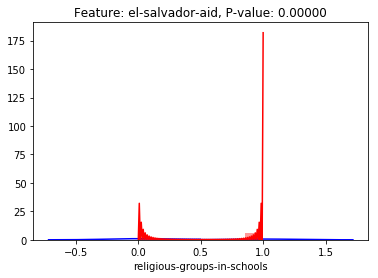

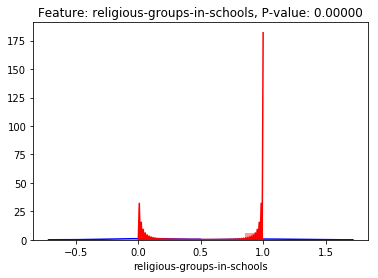

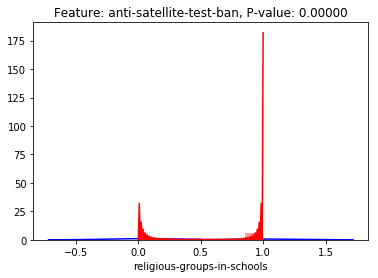

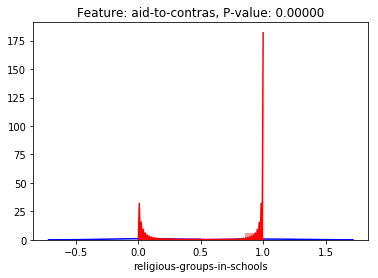

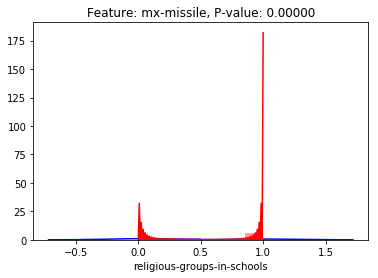

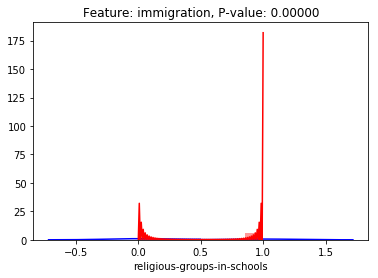

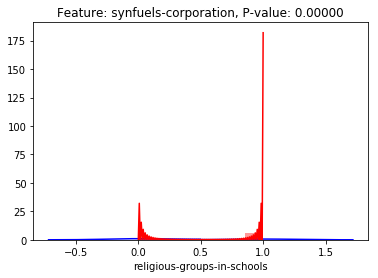

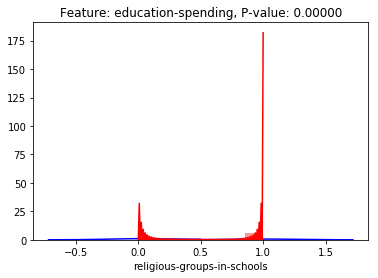

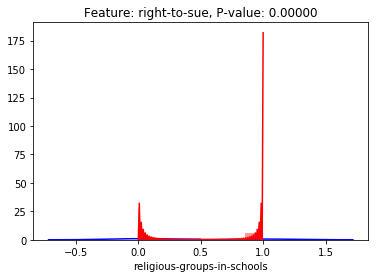

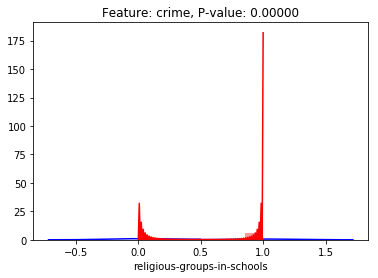

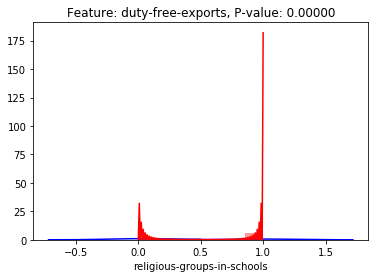

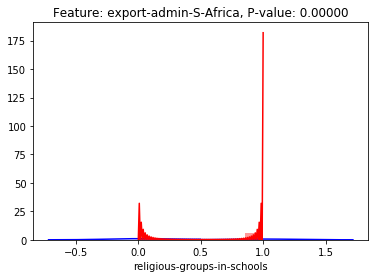

<Figure size 432x288 with 0 Axes>

In [36]:
for i in data['religious-groups-in-schools']:
  # Split groups
    #Originally made with dems[i].value_counts() - Graphs look okay, but I think they are graphing the wrong things

    
  group1 = sample_data_dems
  group2 = sample_data_reps
  
  # Plot distribution
  sns.distplot(group1, color = 'b')
  sns.distplot(group2, color = 'r')
  
  # Run t-test
  _, pvalue = ttest_ind(group1, group2)
  
  # Plot
  plt.title(f'Feature: {i}, P-value: {pvalue:.5f}')
  plt.figure()
    
    
    
#Something going wrong, and I'm not sure what. The graphs look like generally normal distributions before (when using full population), but now they're just 0/1 

In [14]:
print(dems.shape)
print(reps.shape)

(267, 17)
(168, 17)
